# Autoregression Model for Alibaba (BABA)

> For research purposes only; not intended as investment advice.

In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.ar_model import AutoReg

In [4]:
ticker_symbol = 'BABA'
baba_data = pd.read_csv('baba_data.csv')

# 1) Test for 10 year period

In [6]:
baba_data.index = pd.to_datetime(baba_data.index)

In [7]:
baba_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2282 entries, 1970-01-01 00:00:00 to 1970-01-01 00:00:00.000002281
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2282 non-null   float64
 1   High       2282 non-null   float64
 2   Low        2282 non-null   float64
 3   Close      2282 non-null   float64
 4   Adj Close  2282 non-null   float64
 5   Volume     2282 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 124.8 KB


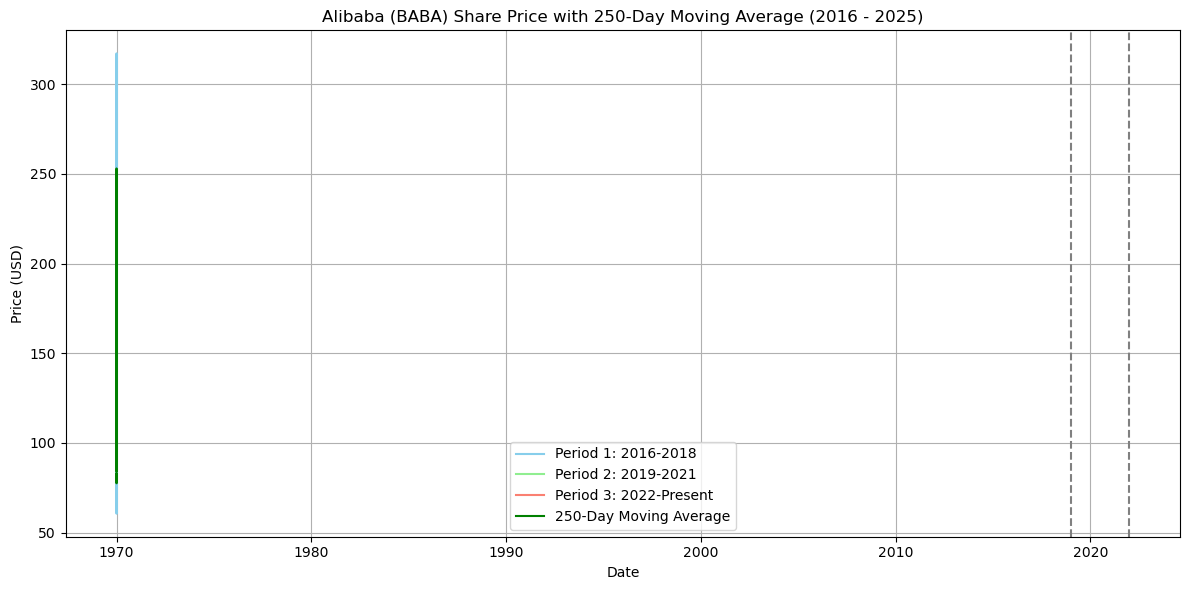

In [8]:
baba_data['250_MA'] = baba_data['Close'].rolling(window=250).mean()

plt.figure(figsize=(12, 6))

# Plot each period with a different color
plt.plot(baba_data.loc[:'2018-12-31'].index, baba_data.loc[:'2018-12-31', 'Close'], label='Period 1: 2016-2018', color='skyblue')
plt.plot(baba_data.loc['2019-01-01':'2021-12-31'].index, baba_data.loc['2019-01-01':'2021-12-31', 'Close'], label='Period 2: 2019-2021', color='lightgreen')
plt.plot(baba_data.loc['2022-01-01':].index, baba_data.loc['2022-01-01':, 'Close'], label='Period 3: 2022-Present', color='salmon')

# Plot the 250-day moving average for the entire time series
plt.plot(baba_data.index, baba_data['250_MA'], label='250-Day Moving Average', color='green')

# Add vertical lines to separate periods
plt.axvline(pd.to_datetime('2018-12-31'), color='gray', linestyle='--')
plt.axvline(pd.to_datetime('2021-12-31'), color='gray', linestyle='--')

# Add titles and labels
plt.title('Alibaba (BABA) Share Price with 250-Day Moving Average (2016 - 2025)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()


In [9]:
# Perform the Augmented Dickey-Fuller test
adf_result = adfuller(baba_data['Close'].dropna())

print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
print("Critical Values:", adf_result[4])

if adf_result[1] < 0.05:
    print("The time series is stationary (reject the null hypothesis of non-stationarity).")
else:
    print("The time series is not stationary (fail to reject the null hypothesis).")

ADF Statistic: -1.4513862377588949
p-value: 0.5574083444774248
Critical Values: {'1%': -3.4332532193008443, '5%': -2.862822565622804, '10%': -2.5674527697012306}
The time series is not stationary (fail to reject the null hypothesis).


* As it is not stationary, we cannot use AR model.

# 2) From 2022 after restructuring and repositioning

In [12]:
# Load the data with the new date range
baba_data_recent = pd.read_csv("baba_data_recent.csv")

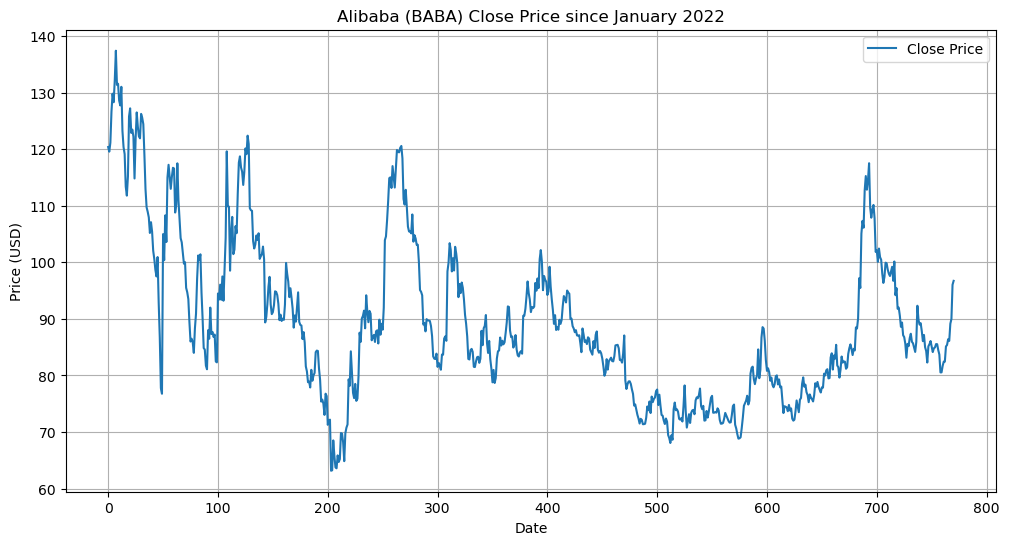

ADF Statistic: -3.3834686725744376
p-value: 0.011535499584160799
Critical Values: {'1%': -3.4388710830827125, '5%': -2.8653008652386576, '10%': -2.568772659807725}
The time series is stationary (reject the null hypothesis of non-stationarity).


In [13]:
# Test for stationary time series

# Step 1: Plot the close price series
plt.figure(figsize=(12, 6))
plt.plot(baba_data_recent['Close'], label='Close Price')
plt.title('Alibaba (BABA) Close Price since January 2022')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# Step 2: Perform the Augmented Dickey-Fuller test on the recent data
adf_result_recent = adfuller(baba_data_recent['Close'].dropna())

# Step 3: Display the test results
print("ADF Statistic:", adf_result_recent[0])
print("p-value:", adf_result_recent[1])
print("Critical Values:", adf_result_recent[4])

# Step 4: Check stationarity based on the p-value
if adf_result_recent[1] < 0.05:
    print("The time series is stationary (reject the null hypothesis of non-stationarity).")
else:
    print("The time series is not stationary (fail to reject the null hypothesis).")

* 2022 marks the beginning of a new era for Alibaba following Jack Ma's step down in 2019 and multiple fines imposed by the Chinese authority.

# 3) Evaluating Autoregression Model

In [16]:
baba_data_recent.reset_index(inplace=True)

In [17]:
ar_model = AutoReg(baba_data_recent['Close'], lags=1, old_names=False).fit()
print(ar_model.summary())

                            AutoReg Model Results                             
Dep. Variable:                  Close   No. Observations:                  771
Model:                     AutoReg(1)   Log Likelihood               -1946.278
Method:               Conditional MLE   S.D. of innovations              3.030
Date:                Thu, 30 Jan 2025   AIC                           3898.556
Time:                        16:31:30   BIC                           3912.495
Sample:                             1   HQIC                          3903.920
                                  771                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2958      0.695      3.302      0.001       0.933       3.659
Close.L1       0.9739      0.008    126.616      0.000       0.959       0.989
                                    Roots           

* As the coefficient of the lag variable is 0.9739, which is nearly 1, it suggests a process close to a random walk.

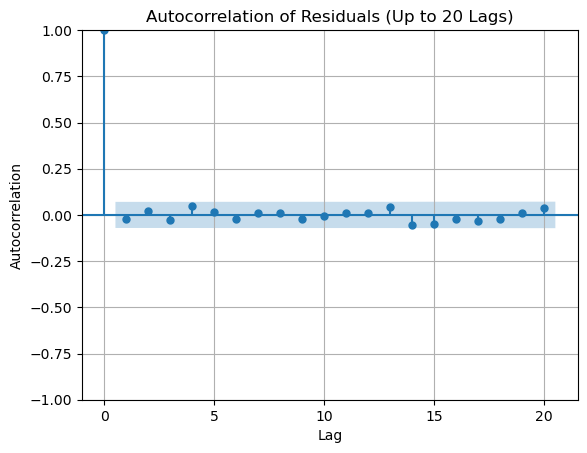

In [19]:
from statsmodels.graphics.tsaplots import plot_acf

# Extract residuals from the fitted AR model
residuals = ar_model.resid

# Generate the autocorrelation plot for residuals up to 10 lags
plot_acf(residuals, lags=20)
plt.title('Autocorrelation of Residuals (Up to 20 Lags)')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()


There is no serial correlation issue.

In [21]:
# Calculate the mean-reverting level
phi = ar_model.params['Close.L1']  # Lag coefficient
intercept = ar_model.params['const']  # Intercept term

if abs(phi) < 1:  # Mean reversion occurs only if |phi| < 1
    mean_reverting_level = intercept / (1 - phi)
    print(f"Mean-Reverting Level: {mean_reverting_level:.4f}")
else:
    print("The series does not exhibit mean reversion since |phi| >= 1.")


Mean-Reverting Level: 88.0968


# 4) Prediction

In [23]:
baba_data_recent['Fitted'] = ar_model.fittedvalues
forecast_steps = 10
forecast_values = ar_model.forecast(steps=forecast_steps)

print(f"Next {forecast_steps} forecasted values:\n", forecast_values)

Next 10 forecasted values:
 771    96.495282
772    96.276419
773    96.063259
774    95.855654
775    95.653460
776    95.456534
777    95.264741
778    95.077945
779    94.896017
780    94.718831
dtype: float64


* As the process of the closed stock price is nearly randomn, it is not valuable for trading. The prediction just shows the forecasts revert to its mean reverting level.